# DATA - Advanced Methods of Data Processing 
## Exercise: Ping data distributions

Now you should have all needed tools to make full analysis for a PING file. In this exercise we use a bit longer PING file with > 1 million rows. Even if the file is only 66MB, it can cause problems in docker container CLI operations (e.g. sed). If you are not able to run CLI commands inside container in your own computer, use jupyterhub.dclabra.fi environment. :) 


In [1]:
## Your code here 
print("Exercise by: Janne Bragge")

Exercise by: Janne Bragge


#### Step 1: Preprosess the data and read it to Pandas dataframe 
**Phase 1.** Copy `../data/google_big.txt` to your working file

**Phase 2.** Remove duplicate lines (indicated with DUP)
```
DUPLICATE AND DAMAGED PACKETS         top
       ping will report duplicate and damaged packets. Duplicate packets
       should never occur, and seem to be caused by inappropriate
       link-level retransmissions. Duplicates may occur in many
       situations and are rarely (if ever) a good sign, although the
       presence of low levels of duplicates may not always be cause for
       alarm.

       Damaged packets are obviously serious cause for alarm and often
       indicate broken hardware somewhere in the ping packet's path (in
       the network or in the hosts).
```

**Phase 3.** Replace timeout lines with NaN (`Request timeout for icmp_seq xxx`)

**Phase 4.** Remove first header line (`PING google.com (74.125.205.101): 56 data bytes`)

**Phase 5.** Remove PING statistics from the end 
```
--- google.com ping statistics ---
1047670 packets transmitted, 981599 packets received, +2 duplicates, 6.3% packet loss
round-trip min/avg/max/stddev = -311.263/102.099/4834947.358/16183.947 ms
````
**Phase 6.** Read ping times and NaNs to pandas dataframe named `google_big`.

**Phase 7.** Use `plot()` and `hist(bins=50)` to visualize `google_big` data.

**Phase 8.** Print dataframe length.

**Phase 9.** Print dataframe statistics with `describe()`. 

**Phase 10.** Save dataframe min and max values to variables `google_big_min` and `google_big_max`. 




In [2]:
## Phases 1-5 (File operations)

In [3]:
## Task 1:
## Your code here 

import shutil

source_file = "../data/google_big.txt"  # Path to the source file
destination_file = "google_big.txt"     # Name of the destination file in your working directory
# Copy the file to your working directory
shutil.copy(source_file, destination_file)
#Phase 2
# Read the content of the text file into a list
with open('google_big.txt', 'r') as file:
    lines = file.readlines()
# Filter out lines containing "DUP"
filtered_lines = [line for line in lines if "DUP" not in line]
# Write the filtered lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(filtered_lines)
#Phase 3
# Read the content of the text file into a list
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Replace timeout lines with "NaN"
for i, line in enumerate(lines):
    if "Request timeout" in line:
        lines[i] = "NaN\n"
# Write the modified lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(lines)
#Phase 4
# Read the content of the text file into a list
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Exclude the first line (header line)
lines = lines[1:]
# Write the modified lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(lines)
#Phase 5
# Read the content of the text file into a list
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Find the index of the line starting with "--- google.com ping statistics ---"
statistics_index = None
for i, line in enumerate(lines):
    if line.startswith("--- google.com ping statistics ---"):
        statistics_index = i
        break
# Exclude the "PING statistics" section and subsequent lines if found
if statistics_index is not None:
    lines = lines[:statistics_index]
# Exclude the last empty line
lines = lines[:-1]
# Write the modified lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(lines) 

In [4]:
## Phase 6 (Read data to Pandas dataframe)

In [5]:
## Task 2:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Read the content of the text file into a list
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Remove newline characters and split lines based on "time="
cleaned_lines = [line.strip().split('time=') for line in lines]
# Create a DataFrame with the ping times and NaNs
data = {'0': []}
Nans = {'NaN': []}
for parts in cleaned_lines:
    if len(parts) == 2:  # Check if the line contains a ping time
        try:
            # Extract the substring containing the ping time and remove "ms"
            ping_time = float(parts[1].split(' ')[0].replace(' ms', ''))
            ping_time_rounded = np.around(ping_time, decimals=3)  # Round to 3 decimals
            data['0'].append(ping_time_rounded)
            Nans['NaN'].append(0)
        except ValueError:
            print("Invalid format for ping time in line:", parts)
    else:  # Handle lines containing "NaN"
        data['0'].append(None)
        Nans['NaN'].append(1)
google_big = pd.DataFrame(data)

In [6]:
## Phases 7-10 (1st analysis of the dataframe)

# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

google_big length is: 1047670
google_big min is: -311.26
google_big min is: 4834947.36
                  0
count  9.815990e+05
mean   1.020991e+02
std    1.618397e+04
min   -3.112630e+02
25%    2.279900e+01
50%    2.487500e+01
75%    4.124700e+01
max    4.834947e+06


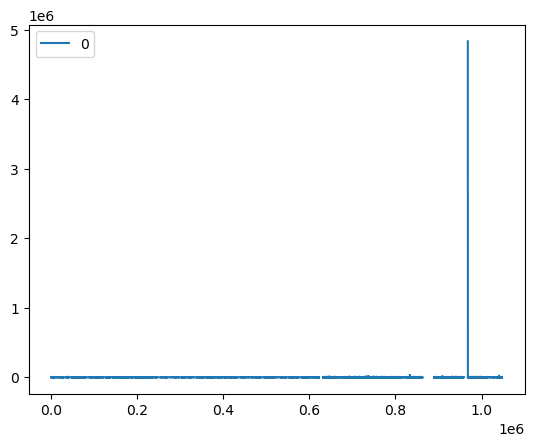

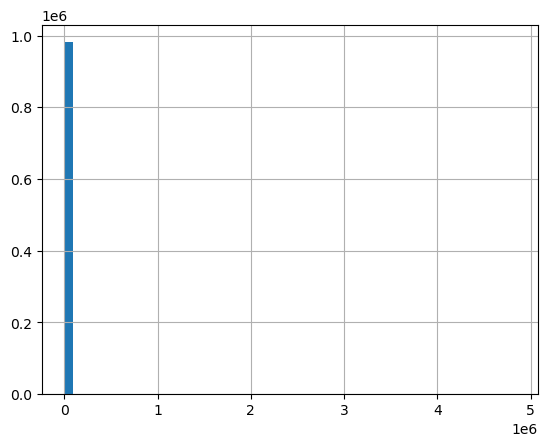

In [7]:
## Task 3:
# Calculate len, min and max values
google_big_min = np.around(google_big['0'].min(), decimals=2)
google_big_max = np.around(google_big['0'].max(), decimals=2)
print("google_big length is:", len(google_big))
print("google_big min is:", google_big_min)
print("google_big min is:", google_big_max)
# print table
describe = google_big.describe()
print(describe)
# print plot
google_big['0'].plot()
plt.legend()
plt.show()
# print hist
google_big['0'].hist(bins=50)
plt.show()


#### Step 2: Erroneous data points

We are using PING to measure IP-packet round-trip-time to google server and back. So values should always be positive. And let's assume that also values > 10s are not correct. As we noticed in Task 10 there are data points < 0ms and > 10 000ms in the dataframe. Let's remove those line from dataframe. 

**Phase 11:** Remove negative data points

**Phase 12:** Remove data points > 10s

**Phase 13.** Use `plot()` and `hist(bins=50)` to visualize `google_big` data.

**Phase 14.** Print dataframe length.
***Hint.*** *You should get* `google_big length is: 1047670`

**Phase 15.** Print dataframe statistics with describe(). 

**Phase 16.** Save dataframe min and max values to variables `google_big_min2` and `google_big_max2`. 



In [8]:
## Phases 11-16

# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

google_big length is: 1047670
google_big min2 is: 17.97
google_big max2 is: 5614.72
                   0
count  981558.000000
mean       47.531631
std       111.149551
min        17.973000
25%        22.799000
50%        24.875000
75%        41.246000
max      5614.719000


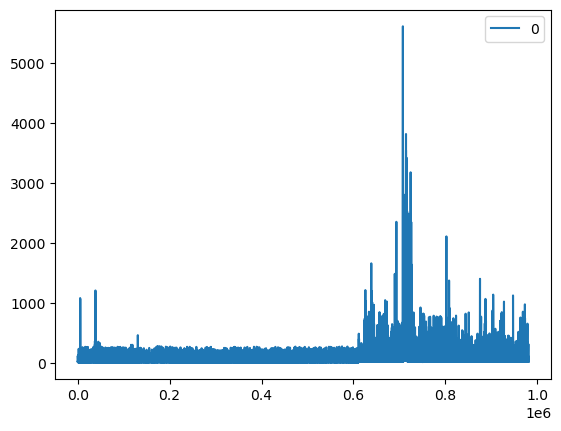

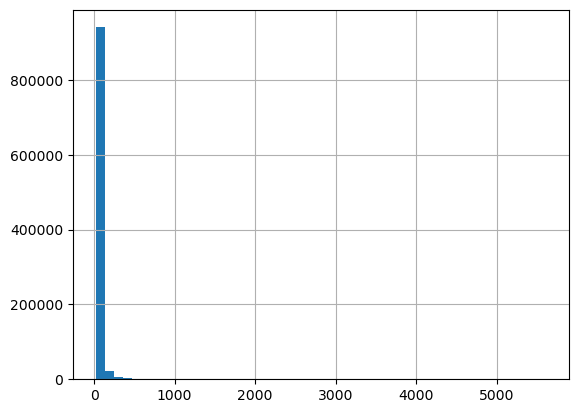

In [9]:
## Task 4:
data_copy = data
for key, values in data_copy.items():
    # Exclude None values before performing comparison
    data_copy[key] = [value for value in values if value is not None and value >= 0 and value <= 10000]
google_big2 = pd.DataFrame(data_copy)
# Calculate len, min and max values and print those
google_big_length = len(google_big)
google_big_min2 = np.around(google_big2.min(), decimals=2).iloc[0]  # Accessing the first element
google_big_max2 = np.around(google_big2.max(), decimals=2).iloc[0]  # Accessing the first element
print("google_big length is:", google_big_length)
print("google_big min2 is:", google_big_min2)
print("google_big max2 is:", google_big_max2)
#describe the data
describe2 = google_big2.describe()
print(describe2)
# print plot
google_big2['0'].plot()
plt.legend()
plt.show()
# print hist
google_big2['0'].hist(bins=50)
plt.show()

#### Step 3: Dataframe split to WiFi and LTE dataframes 

You should be able to see from the dataset that it consists of two different parts (i.e. WiFi part [first part] and LTE part [second part]). Do visual split to WiFi part and LTE part, remove NaN samples between datasets because they don't belong to either of datasets and calculate statistics for both datasets.

**Phase 17:** Split data visually to WiFi dataset and LTE dataset

```
Note. Remember to remove NaN samples between datasets.
Hint1. There is ping timeout block, when connection is changed from WiFi to LTE.
Hint2. You can zoom plot image with command "plt.axis([x_min, x_max, y_min, y_max])"
```

**Phase 18:** Print dataframe length for both datasets


In [10]:
## Phases 17-18

In [11]:
## Task 5:
## Your code here 
# Define the line number you want to cut out
line_number_to_cut = 622124  # For example, if you want to cut out line number 5
line_number_to_start = 631915
# Open the original file for reading
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Open a new file for writing
with open('wifi.txt', 'w') as new_file:
    # Write all lines except the one you want to cut out
    for line in lines[:line_number_to_cut]:
        new_file.write(line)
with open('lte.txt', 'w') as new_file:
    # Write all lines except the one you want to cut out
    for line in lines[line_number_to_start:]:
        new_file.write(line)
# Read the content of the text file into a list
with open('wifi.txt', 'r') as file:
    lines = file.readlines()

# Remove newline characters and split lines based on "time="
wifi_cleaned_lines = [line.strip().split('time=') for line in lines]

# Create a DataFrame with the ping times and NaNs
wifi_data = {'0': []}
wifi_Nans = {'NaN': []}
for parts in wifi_cleaned_lines:
    if len(parts) == 2:  # Check if the line contains a ping time
        try:
            # Extract the substring containing the ping time and remove "ms"
            ping_time = float(parts[1].split(' ')[0].replace(' ms', ''))
            ping_time_rounded = np.around(ping_time, decimals=3)  # Round to 3 decimals
            wifi_data['0'].append(ping_time_rounded)
            wifi_Nans['NaN'].append(0)
        except ValueError:
            print("Invalid format for ping time in line:", parts)
    else:  # Handle lines containing "NaN"
        wifi_data['0'].append(None)
        wifi_Nans['NaN'].append(1)

wifi_df = pd.DataFrame(wifi_data)
wifi_df_Nans =pd.DataFrame(wifi_Nans)

print("Wifi length is:", len(wifi_df))

wifi_data_copy = wifi_data

for key, values in wifi_data_copy.items():
    # Exclude None values before performing comparison
    wifi_data_copy[key] = [value for value in values if value is not None and value >= 0 and value <= 10000]

wifi_df_copy = pd.DataFrame(wifi_data_copy)

# Read the content of the text file into a list
with open('lte.txt', 'r') as file:
    lines = file.readlines()

# Remove newline characters and split lines based on "time="
lte_cleaned_lines = [line.strip().split('time=') for line in lines]

# Create a DataFrame with the ping times and NaNs
lte_data = {'0': []}
lte_Nans = {'NaN': []}
for parts in lte_cleaned_lines:
    if len(parts) == 2:  # Check if the line contains a ping time
        try:
            # Extract the substring containing the ping time and remove "ms"
            ping_time = float(parts[1].split(' ')[0].replace(' ms', ''))
            ping_time_rounded = np.around(ping_time, decimals=3)  # Round to 3 decimals
            lte_data['0'].append(ping_time_rounded)
            lte_Nans['NaN'].append(0)
        except ValueError:
            print("Invalid format for ping time in line:", parts)
    else:  # Handle lines containing "NaN"
        lte_data['0'].append(None)
        lte_Nans['NaN'].append(1)

lte_df = pd.DataFrame(lte_data)
lte_df_Nans =pd.DataFrame(lte_Nans)
print("LTE length is:", len(lte_df))

Wifi length is: 622124
LTE length is: 415755


#### Step 4: Analyse Wifi and LTE dataframe distributions 

You should be able to see from the dataset that it consists of two different parts (i.e. Wifi part [first part] and LTE part [second part]). Do visual split to Wifi part and LTE part, remove NaN samples between datasets because they don't belong to either of datasets and calculate statistics for both datasets.

**Phase 19:** Print dataframe statistics for both datasets

**Phase 20:** Plot normalized histogram with 100 bins and range 0 to 100ms of both datasets. Include also title, xlabel and legend.



In [12]:
## Phase 19

# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

In [13]:
## Task 6:
## Your code here 
print('Wifi')
#Count
wifi_df.dropna(inplace=True)
google_wifi_count = len(wifi_df)
print("Count: ", google_wifi_count)
#Mean
wifi_mean_value = np.mean(wifi_df)
google_wifi_mean = np.around(wifi_mean_value, decimals=2)
print("Mean: ", google_wifi_mean)
#Standard deviation
std_value = wifi_df.std(axis=0) 
google_wifi_std = np.around(std_value.iloc[0], decimals=2)
print("Std: ", google_wifi_std)
# Kurtosis
wifi_kurtosis_value = wifi_df.kurtosis()
google_wifi_kurtosis = np.around(wifi_kurtosis_value.iloc[0], decimals=2)
print("Kurtosis: ", google_wifi_kurtosis)
# Skew
wifi_skew_value = wifi_df.skew()
google_wifi_skew = np.around(wifi_skew_value.iloc[0], decimals=2)
print("Skew: ", google_wifi_skew)
# IQR (Interquartile Range)
q75, q25 = np.percentile(wifi_df, [75 ,25])
google_wifi_IQR = np.around((q75 - q25), decimals=2)
print("IQR: ", google_wifi_IQR)
# Min-value
wifi_min_value = np.min(wifi_df_copy)
google_wifi_min = np.around(wifi_min_value, decimals=2)
print("Min: ", google_wifi_min)
# Max-value
wifi_max_value = np.max(wifi_df)
google_wifi_max = np.around(wifi_max_value, decimals=2)
print("Max: ", google_wifi_max)
# Median
wifi_median_value = np.median(wifi_df)
google_wifi_median = np.around(wifi_median_value, decimals=2)
print("Median: ", google_wifi_median)
# Availability
google_wifi_availability = np.around(len(wifi_df) / len(wifi_df_Nans), decimals=2)
print("Availability: ", google_wifi_availability)

print('LTE')
#Count
lte_df.dropna(inplace=True)
google_lte_count = len(lte_df)
print("Count: ", google_lte_count)
#Mean
lte_mean_value = np.mean(lte_df)
google_lte_mean = np.around(lte_mean_value, decimals=2)
print("Mean: ", google_lte_mean)
#Standard deviation
lte_std_value = lte_df.std(axis=0) 
google_lte_std = np.around(lte_std_value.iloc[0], decimals=2)
print("Std: ", google_lte_std)
# Kurtosis
lte_kurtosis_value = lte_df.kurtosis()
google_lte_kurtosis = np.around(lte_kurtosis_value.iloc[0], decimals=2)
print("Kurtosis: ", google_lte_kurtosis)
# Skew
lte_skew_value = lte_df.skew()
google_lte_skew = np.around(lte_skew_value.iloc[0], decimals=2)
print("Skew: ", google_lte_skew)
# IQR (Interquartile Range)
q75, q25 = np.percentile(lte_df, [75 ,25])
google_lte_IQR = np.around((q75 - q25), decimals=2)
print("IQR: ", google_lte_IQR)
# Min-value
lte_min_value = np.min(lte_df)
google_lte_min = np.around(lte_min_value, decimals=2)
print("Min: ", google_lte_min)
# Max-value
lte_max_value = np.max(lte_df)
google_lte_max = np.around(lte_max_value, decimals=2)
print("Max: ", google_lte_max)
# Median
lte_median_value = np.median(lte_df)
google_lte_median = np.around(lte_median_value, decimals=2)
print("Median: ", google_lte_median)
# Availability
google_lte_availability = np.around(len(lte_df) / len(lte_df_Nans), decimals=2)
print("Availability: ", google_lte_availability)

Wifi
Count:  611731
Mean:  25.48
Std:  16.42
Kurtosis:  317.25
Skew:  12.03
IQR:  2.44
Min:  17.97
Max:  1214.53
Median:  23.24
Availability:  0.98
LTE
Count:  369868
Mean:  228.82
Std:  26364.59
Kurtosis:  33614.58
Skew:  183.34
IQR:  22.85
Min:  -311.26
Max:  4834947.36
Median:  45.2
Availability:  0.89


In [14]:
## Phases 20

# Hint. see histogram function params
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html or
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

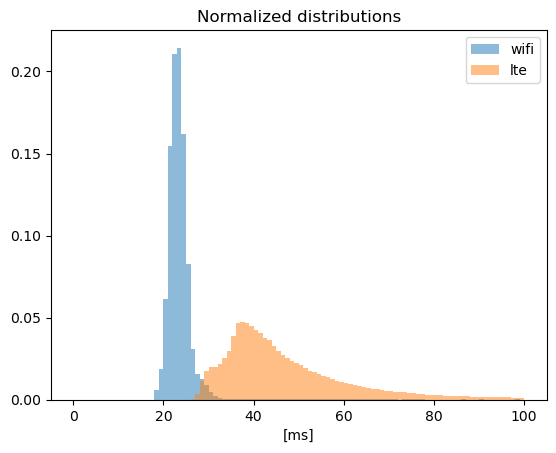

In [15]:
## Task 7:
## Your code here 
# Assuming wifi_df['0'] and wifi_df['1'] are your DataFrame columns containing the datasets
plt.hist(wifi_df['0'], bins=100, range=(0, 100), alpha=0.5, density=True, label='wifi')
plt.hist(lte_df['0'], bins=100, range=(0, 100), alpha=0.5, density=True, label='lte')

plt.title('Normalized distributions')
plt.xlabel('[ms]')

plt.legend()
plt.show()
 

### Reflection
1. Based on your results, compare Wifi dataset and LTE datasets. (Compare at least connection speed, connection availability and connection stability.) Which one is better?
2. How distributions differ?

1. data-aineiston perusteella wifi tarjoaa nopeampia ja vakaampia yhteyksiä kun taas LTE yhteysnopeuden ovat hitaampia vaihtelu jakautuu laajemmalle alueelle. Yhteyden saatavuuden perusteella myös wifi on luotettavampi kuin LTE-yhteys (98% vs. 89%).


2.   On kuitenkin huomattava mittaustapa, sillä Wifi tarjoaa tässä data-aineistossa laadukaamman yhteyden mutta wifi on todellisuudessa hyvin riippuvainen siittä että wifi tukiasema on lähellä ja esteettömästi saatavilla. Yleisesti ottaen Wifi on haavoittuvaisempi ruuhkautumiselle ja liikkumisen mukana tuleville ympäristön muutoksille kuin LTE-verkko. Myös ruuhkaisuudessa wifi on herkempi kuin LTE


### Check your answers by running following cell:

In [16]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/data_ping_answers/')
from data_ping_check import check_analyze

print("Results:")
correct = check_analyze(google_big_min, google_big_max, google_big_min2, 
        google_big_max2,google_wifi_count, google_wifi_mean, google_wifi_std, google_wifi_kurtosis, google_wifi_skew, 
        google_wifi_IQR, google_wifi_min, google_wifi_max, google_wifi_median, google_wifi_availability,
        google_lte_count, google_lte_mean, google_lte_std, google_lte_kurtosis, google_lte_skew, 
        google_lte_IQR, google_lte_min, google_lte_max, google_lte_median, google_lte_availability)

print("Correct answers", correct, "/ 24.")


Results:
	 'google_wifi_count' is not correct. Please check your answer.
	 'google_wifi_kurtosis' is not correct. Please check your answer.
	 'google_lte_count' is not correct. Please check your answer.
	 'google_lte_mean' is not correct. Please check your answer.
	 'google_lte_std' is not correct. Please check your answer.
	 'google_lte_kurtosis' is not correct. Please check your answer.
	 'google_lte_skew' is not correct. Please check your answer.
	 'google_lte_IQR' is not correct. Please check your answer.
	 'google_lte_min' is not correct. Please check your answer.
	 'google_lte_max' is not correct. Please check your answer.
Correct answers 14 / 24.


### Nice work! 